In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [7]:
df = pd.read_csv("../data/processed_MOFs.csv")
df.shape

(324426, 10)

In [8]:
df.columns = df.columns.str.replace(" ", "")
df.columns

Index(['MOFname', 'CO2_uptake_P0.15bar_T298K[mmol/g]', 'volume[A^3]',
       'weight[u]', 'surface_area[m^2/g]', 'void_fraction',
       'void_volume[cm^3/g]', 'largest_free_sphere_diameter[A]',
       'largest_included_sphere_diameter[A]', 'metal_linker'],
      dtype='object')

In [9]:
df.drop(columns='MOFname', inplace=True)
X = df.copy()
Y = X.pop('CO2_uptake_P0.15bar_T298K[mmol/g]')

In [10]:
X_train, X_dev, y_train, y_dev = train_test_split(X, Y, test_size=1000, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=1000, random_state=1)

print(X_train.shape)
print(X_dev.shape)
print(X_test.shape)

(322426, 8)
(1000, 8)
(1000, 8)


### LINEAR REGRESSION

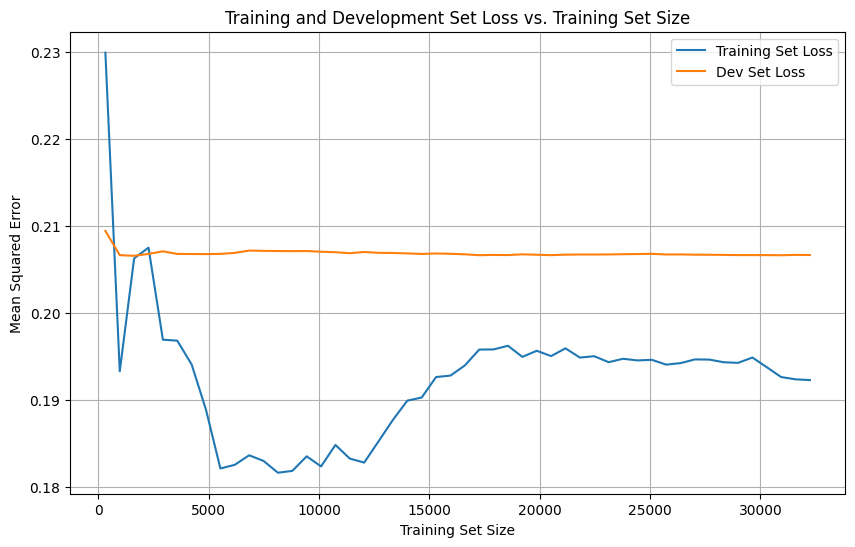

In [23]:

# Initialize lists to store the error values for different training set sizes
train_errors = []
dev_errors = []
train_sizes = [0.01, 0.02, 0.04, 0.06, 0.1]  # Different sizes, from 1% to 10% of the data
train_sizes = np.linspace(0.001, 0.1, 50)
# Train the model on different sizes of the training set
for train_size in train_sizes:
    # Sample a fraction of the training data
    X_train_subset = X_train.sample(frac=train_size, random_state=42)
    y_train_subset = y_train.loc[X_train_subset.index]

    # Initialize and train the model
    model_lr = LinearRegression()
    model_lr.fit(X_train_subset, y_train_subset)

    # Calculate training and development errors
    y_train_pred = model_lr.predict(X_train_subset)
    y_dev_pred = model_lr.predict(X_dev)

    train_errors.append(mean_squared_error(y_train_subset, y_train_pred))
    dev_errors.append(mean_squared_error(y_dev, y_dev_pred))
    #print(f"Train size: {train_size * len(X_train):.0f} samples")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(np.array(train_sizes) * len(X_train), train_errors, label="Training Set Loss")
plt.plot(np.array(train_sizes) * len(X_train), dev_errors, label="Dev Set Loss")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.title("Training and Development Set Loss vs. Training Set Size")
plt.legend()
plt.grid()
plt.show()


In [36]:
y_test_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_test_pred_lr)
print(mse_lr)

0.22700424608687006


In [27]:
new_data = X_test[:5]
true_value = y_test[:5]
prediction = model_lr.predict(new_data)
error = mean_squared_error(true_value, prediction)
print(prediction)
print(true_value)
print(error)

[0.72454796 0.23090511 0.83333015 0.27433467 0.37168376]
57264     0.796062
240235    0.207658
10149     1.963029
284526    0.155751
79450     0.615503
Name: CO2_uptake_P0.15bar_T298K[mmol/g], dtype: float64
0.2710768187177493


### GRADIENT BOOST

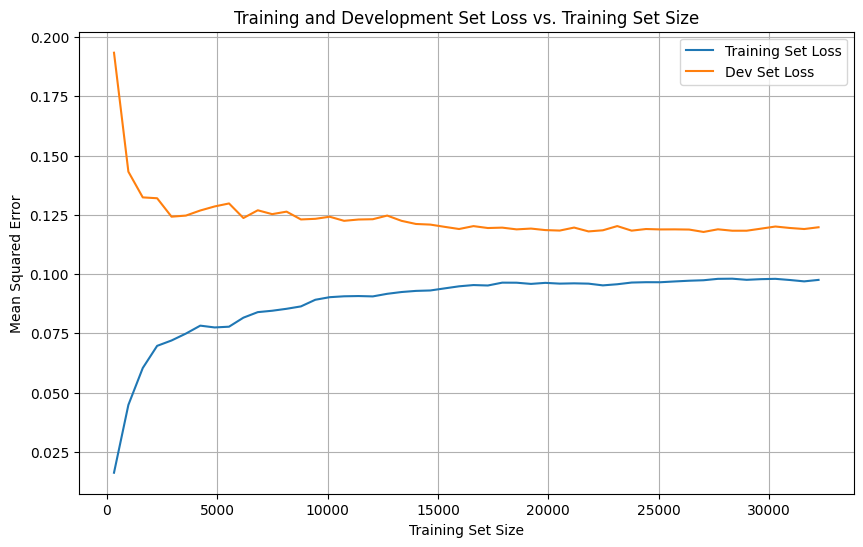

In [13]:

# Initialize lists to store the error values for different training set sizes
train_errors = []
dev_errors = []
train_sizes = [0.01, 0.02, 0.04, 0.06, 0.1]  # Different sizes, from 1% to 10% of the data
train_sizes = np.linspace(0.001, 0.1, 50)
# Train the model on different sizes of the training set
for train_size in train_sizes:
    # Sample a fraction of the training data
    X_train_subset = X_train.sample(frac=train_size, random_state=42)
    y_train_subset = y_train.loc[X_train_subset.index]

    # Initialize and train the model
    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train_subset, y_train_subset)

    # Calculate training and development errors
    y_train_pred = model.predict(X_train_subset)
    y_dev_pred = model.predict(X_dev)

    train_errors.append(mean_squared_error(y_train_subset, y_train_pred))
    dev_errors.append(mean_squared_error(y_dev, y_dev_pred))
    #print(f"Train size: {train_size * len(X_train):.0f} samples")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(np.array(train_sizes) * len(X_train), train_errors, label="Training Set Loss")
plt.plot(np.array(train_sizes) * len(X_train), dev_errors, label="Dev Set Loss")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.title("Training and Development Set Loss vs. Training Set Size")
plt.legend()
plt.grid()
plt.show()


In [35]:
y_test_pred_gb = model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_test_pred_gb)
print(mse_gb)

0.12394552062658991


In [15]:
new_data = X_test[:5]
true_value = y_test[:5]
prediction = model.predict(new_data)
error = mean_squared_error(true_value, prediction)
print(prediction)
print(true_value)
print(error)

[0.76112655 0.24217004 0.93408123 0.20651124 0.36225604]
57264     0.796062
240235    0.207658
10149     1.963029
284526    0.155751
79450     0.615503
Name: CO2_uptake_P0.15bar_T298K[mmol/g], dtype: float64
0.22557114019282407


### RANDOM FOREST

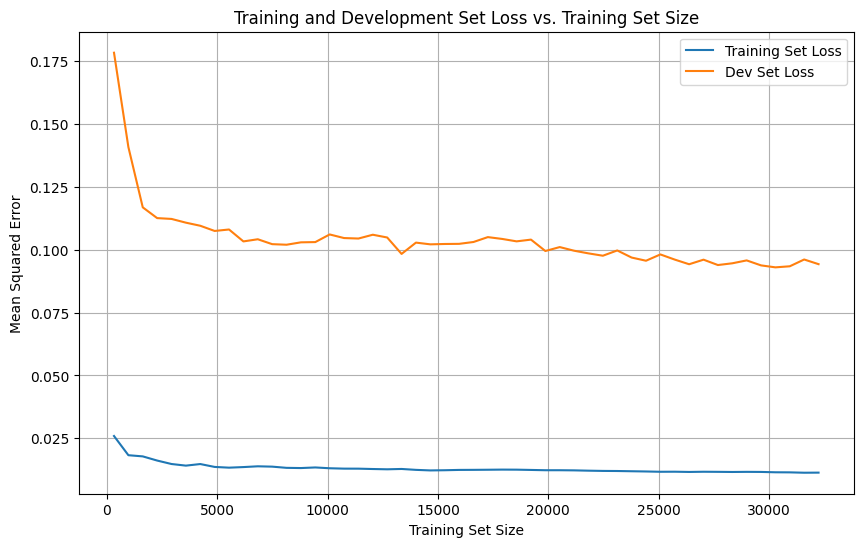

In [32]:

# Initialize lists to store the error values for different training set sizes
train_errors = []
dev_errors = []
train_sizes = [0.01, 0.02, 0.04, 0.06, 0.1]  # Different sizes, from 1% to 10% of the data
train_sizes = np.linspace(0.001, 0.1, 50)
# Train the model on different sizes of the training set
for train_size in train_sizes:
    # Sample a fraction of the training data
    X_train_subset = X_train.sample(frac=train_size, random_state=42)
    y_train_subset = y_train.loc[X_train_subset.index]

    # Initialize and train the model
    model_rf = RandomForestRegressor(random_state=42)
    model_rf.fit(X_train_subset, y_train_subset)

    # Calculate training and development errors
    y_train_pred = model_rf.predict(X_train_subset)
    y_dev_pred = model_rf.predict(X_dev)

    train_errors.append(mean_squared_error(y_train_subset, y_train_pred))
    dev_errors.append(mean_squared_error(y_dev, y_dev_pred))
    #print(f"Train size: {train_size * len(X_train):.0f} samples")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(np.array(train_sizes) * len(X_train), train_errors, label="Training Set Loss")
plt.plot(np.array(train_sizes) * len(X_train), dev_errors, label="Dev Set Loss")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.title("Training and Development Set Loss vs. Training Set Size")
plt.legend()
plt.grid()
plt.show()

In [37]:
y_test_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_test_pred_rf)
print(mse_rf)

0.10224511329721847


In [34]:
new_data = X_test[:5]
true_value = y_test[:5]
prediction = model.predict(new_data)
error = mean_squared_error(true_value, prediction)
print(prediction)
print(true_value)
print(error)

[0.76112655 0.24217004 0.93408123 0.20651124 0.36225604]
57264     0.796062
240235    0.207658
10149     1.963029
284526    0.155751
79450     0.615503
Name: CO2_uptake_P0.15bar_T298K[mmol/g], dtype: float64
0.22557114019282407


In [44]:
print('MSE for LinearRegression on test set', mse_lr)
print('MSE for GradientBoostRegressor on test set', mse_gb)
print('MSE for RandomForestRegressor on test set', mse_rf)

MSE for LinearRegression on test set 0.22700424608687006
MSE for GradientBoostRegressor on test set 0.12394552062658991
MSE for RandomForestRegressor on test set 0.10224511329721847


### RANDOMIZED SEARCH

Random Forest

In [50]:
random_grid_rf = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
               'max_features': [None, 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [50, 100, 200]}

In [51]:
X_train_subset = X_train.sample(frac=0.03, random_state=42)
y_train_subset = y_train.loc[X_train_subset.index]

rf = RandomForestRegressor(random_state=42)

rf_random = RandomizedSearchCV(estimator = model_rf, param_distributions = random_grid_rf, n_iter = 10, cv = 3, verbose=2, random_state=42)
# Fit the random search model
rf_random.fit(X_train_subset, y_train_subset)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   2.5s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   2.4s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   2.4s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': [None, 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, verbose=2)

In [52]:
print(rf_random.best_params_)

{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 30, 'bootstrap': True}


Gradient Boost

In [53]:
# Define the grid of hyperparameters to search
hyperparameter_grid_gb = {'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 3, 5, 10, 50, None],
    'min_samples_leaf': [1, 2, 4] ,
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2', None]}

In [54]:
gbr = GradientBoostingRegressor()

# Set up the random search with 4-fold cross validation
gb_random = RandomizedSearchCV(estimator=gbr,
            param_distributions=hyperparameter_grid_gb,
            cv=3, 
            n_iter=10,
            verbose = 2,
            random_state=42)

gb_random.fit(X_train_subset,y_train_subset)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END learning_rate=0.2, loss=huber, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  52.4s
[CV] END learning_rate=0.2, loss=huber, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  51.1s
[CV] END learning_rate=0.2, loss=huber, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  51.0s
[CV] END learning_rate=0.01, loss=absolute_error, max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  42.5s
[CV] END learning_rate=0.01, loss=absolute_error, max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  42.4s
[CV] END learning_rate=0.01, loss=absolute_error, max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3, 0.5],
                                        'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile'],
                                        'max_depth': [2, 3, 5, 10, 50, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, verbose=2)

In [57]:
print(gb_random.best_params_)

{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'loss': 'huber', 'learning_rate': 0.1}


### Visual with W&B

In [4]:
import wandb 

wandb.init(project='visualize-sklearn-mof-project')

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: lukasradmann (lukasradmann-uppsala-universitet). Use `wandb login --relogin` to force relogin


In [14]:
X_train_subset = X_train.sample(frac=0.03, random_state=42)
y_train_subset = y_train.loc[X_train_subset.index]


# All regression plots
wandb.sklearn.plot_regressor(model, X_train_subset, X_test, y_train_subset, y_test, model_name="Gradient Boost Regressor")

wandb: 
wandb: Plotting Gradient Boost Regressor.


/Users/lukasradmann/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
wandb: Logged summary metrics.
wandb: Logged learning curve.
/Users/lukasradmann/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
wandb: WARNING using only the first 1000 datapoints to create chart outlier_candidates
wandb: Logged outlier candidates.
/Users/lukasradmann/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
wandb: WARNING using only the first 100 datapoints to create chart residuals
wandb: WARNING using only the first 100 datapoints to create chart residuals
wandb: Logged residuals.
